In [2]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit

import matplotlib.ticker as ticker

In [ ]:
# We have completed the Analysis of the VdP oscillator from the Tony Lee paper.
# I now want to perform similar analysis for the assortment of models discussed in the Arosh paper. 
# All thats really needed is the add collapse operators so this shouldn't be too hard to do.
# These graphs won't have been produced before so need to be careful about the conclusions I draw from them.


In [10]:
# We will now consider the VdP oscillator which changes the non-linear emission term to ( xa /2 )
N = 10
a = destroy(N)

k1 = 0.01 
g1 = 0
g2 = 1 * k1

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
Collapse = [ c1 , c2 ,c3]

E = 1 * k1 
D = 0 * k1

H =  D * (a.dag() * a) + (E)*(a + a.dag())

# We are now ready to discuss investigate the behaviour of the VdP oscillator.

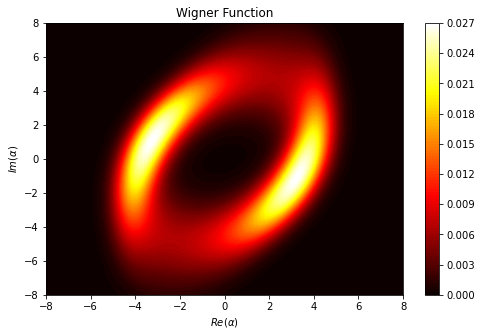

In [90]:
N =  50
a = destroy(N)

k1 = 1
g1 = 0
g2 =  (1/4) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
Collapse = [ c1 , c2 , c3 ]

E = 0 * k1 
D = 1 # * k1 When we want to start driving the system we remove this hash and introduce a drive strength for E.

H =  D * (a.dag() * a) + (E)*(a + a.dag())

###########################################

results = steadystate(H, [ c1 , c2 , c3 ] , method = 'eigen')
P = 100
x = np.linspace(-8, 8 ,P)


W = wigner(results,x,x,g = np.sqrt(4))
wmap = wigner_cmap(W)                                             
nrm = mpl.colors.Normalize(0, W.max())                            

fig, axes = plt.subplots(1, 1, figsize=(8,5))
contour = axes.contourf(x, x, W, 100, cmap=cm.hot, norm = nrm)       
cb = fig.colorbar(contour, ax=axes)                                             
plt.title("Wigner Function")
plt.xlabel(r'$Re (\alpha) $')
plt.ylabel(r'$Im (\alpha) $') 
plt.show()

# What we essentially see is that the VdP oscillator have no preferred phase for small epsilong ( k1 )
# When k1 increases prefered phases begin to form as we can see the circular symmetry breaks.

# Raises the question, does this make it better or worse for synchronisation? 
# If you're in the more quantum regime ( Large k1 ) then the symmetry breaks and preferred phases appear.
# I'd imagine something like an arnold tongue forms where close to the preferred phases/ frequencies small drives lead to synchronisation
# If we try and make it synchronise to something far from its preferred mode then will require larger drives? 

# Obviously these are just best guesses and will need to be properly investigated with the same methods we saw for the RVdP.


0.46058051204186634

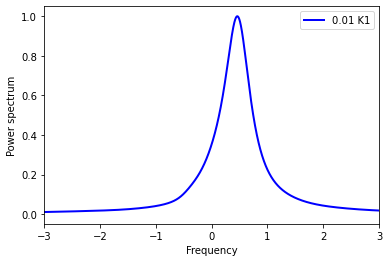

In [16]:
# Confident that the code is working as expected as we have recreated results from Arosh's paper.
# Plan is to now add a drive and detuning, and from there we can find a power spectrum using the correlation function and fourier transformation.
# use this to find the observed frequency and then investigate relations between drive strength, detuning ---> ultimately how synchronisation occurs/ behaves!

# Let's begin: 

N =  50
a = destroy(N)

k1 = 1
g1 = 0
g2 =  (0.1) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
Collapse = [ c1 , c2 , c3 ]

E = 1 * k1 
D = 0.5 * k1

H =  D * (a.dag() * a) + (E)*(a + a.dag())

wlist = np.linspace(-2, 2, 20000) * 2 * np.pi
spec = spectrum(H, wlist, Collapse, a.dag(), a)  

fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec/(spec.max()), 'b', lw=2, label='0.01 K1')

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-3,3)


wlist[(spec.argmax())]


Text(0, 0.5, '$ \\omega $ ')

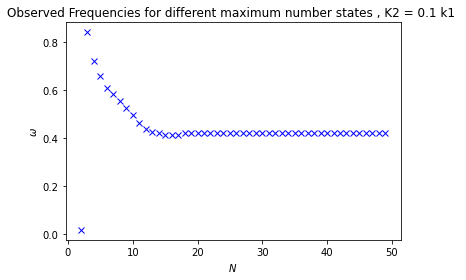

In [18]:
k1 = 1
k2 = 0.1 * k1

Max_N = 50
W_obs_N = []
Range = np.arange(2,Max_N)
for M in Range :
    a = destroy(M)
    H =  D * (a.dag() * a) + (E)*(a + a.dag())
    c1 = np.sqrt(2*k1) * a.dag() 
    c2 = np.sqrt(2*k2) * ( a * a)
    Collapse = [c1 , c2]


    wlist = np.linspace(-2, 2, 5000) * 2 * np.pi
    spec = spectrum(H, wlist, Collapse, a.dag(), a)  

    
    W_obs_N.append(wlist[(spec).argmax()])

    
fig, axes = plt.subplots(1, 1)   
axes.plot(Range , W_obs_N, 'bx') 
plt.title("Observed Frequencies for different maximum number states , K2 = 0.1 k1 ")
plt.xlabel(r'$ N $ ')
plt.ylabel(r'$ \omega $ ') 

# So for the g2 = 0.1 *k1 we see that the frequency converges for roughly 20 N levels 
# This is only an estimate for E and D = some constants. Could include the convergance w.r.t these variables too but as they don't couple to the heat bath
# they shouldn't affect the energy levels too much.

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

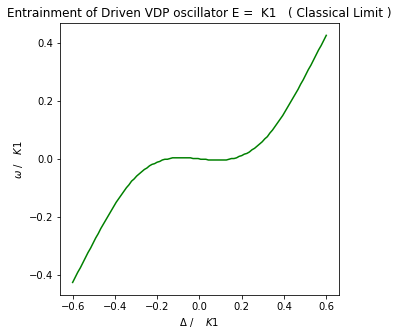

In [27]:
N = 30
a = destroy( N )
k1 = 1
g1 = 0
g2 = (0.05) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
Collapse = [ c1 , c2 , c3 ]

E = 1 * k1 
d_range = np.linspace(-0.6,0.6,100)
wlist = np.linspace(-2, 2, 10000) * 2 * np.pi
frequency_list_classical = []

for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec = spectrum(H, wlist, Collapse, a.dag(), a)

    W_observed = wlist[spec.argmax()]
    
    frequency_list_classical.append(W_observed)
    
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_classical , 'g' )
plt.title("Entrainment of Driven VDP oscillator E =  K1   ( Classical Limit )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

# This produced a plot for the VdP oscillator in the classical limit where g2 = 0.05 k1 ( as prescribed by Tony Lee's paper)

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

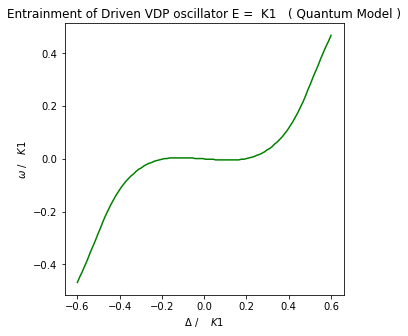

In [28]:
N = 20
a = destroy( N )
k1 = 1
g1 = 0
g2 = (0.1) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
Collapse = [ c1 , c2 , c3 ]

E = 1 * k1 
d_range = np.linspace(-0.6,0.6,100)
wlist = np.linspace(-2, 2, 10000) * 2 * np.pi
frequency_list_quantum = []

for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec = spectrum(H, wlist, Collapse, a.dag(), a)

    W_observed = wlist[spec.argmax()]
    
    frequency_list_quantum.append(W_observed)
    
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum , 'g' )
plt.title("Entrainment of Driven VDP oscillator E =  K1   ( Quantum Model )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')
# This produced a plot of the VdP oscillator for a quantum model, yet not in the quantum limit where k2 is much larger than k1

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

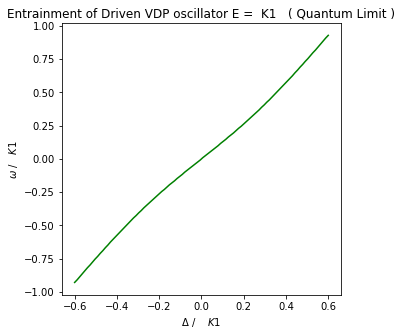

In [29]:
N = 30
a = destroy( N )
k1 = 1
g1 = 0
g2 = (20) * k1 
epsilon = k1 - g1 

Ac = np.sqrt ( epsilon / g2  )

c1 = np.sqrt(k1) * a.dag() 
c2 = np.sqrt(g1) * a 
c3 = np.sqrt(g2/2) * position(N) * a
Collapse = [ c1 , c2 , c3 ]

E = 1 * k1 
d_range = np.linspace(-0.6,0.6,100)
wlist = np.linspace(-2, 2, 10000) * 2 * np.pi
frequency_list_quantum_limit = []

for d in d_range:
    
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())
    
    spec = spectrum(H, wlist, Collapse, a.dag(), a)

    W_observed = wlist[spec.argmax()]
    
    frequency_list_quantum_limit.append(W_observed)
    
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum_limit , 'g' )
plt.title("Entrainment of Driven VDP oscillator E =  K1   ( Quantum Limit )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

# This produced a plot for the VdP in the quanutm limit where k2 = 20 k1

In [31]:
np.save('VdP Observed freq vs detuning k2 = 0.05k1 ',frequency_list_classical)
np.save('VdP Observed freq vs detuning k2 = 0.1k1 ',frequency_list_quantum)
np.save('VdP Observed freq vs detuning k2 = 20k1 ',frequency_list_quantum_limit)

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

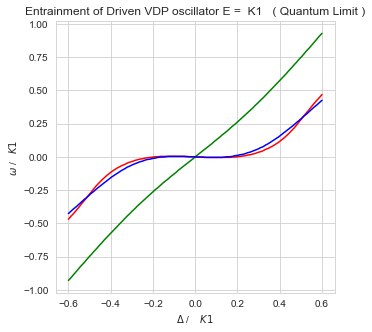

In [33]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_quantum_limit , 'g' , label = ' k2 = 20 k1' )
axes.plot(d_range , frequency_list_quantum , 'r' , label = ' k2 = 0.1 k1')
axes.plot(d_range , frequency_list_classical , 'b', label = ' k2 = 0.05 k1')
plt.title("Entrainment of Driven VDP oscillator E =  K1   ( Quantum Limit )")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')


# When we compare this graph with how the RVdP looks it's clear that this oscillator has a larger synchronisation region
# For the same drive strength synchronisation survives a range of detunings ( -0.3 , 0.3 )
# in contrast to the RVdP oscillator which only synchronises between ( -0.2 , 0.2 )

# they both also agree that in the quantum limit the region is destroyed, again due to quantum noise.

In [ ]:
# We have seen how we are able to compare how the RVdP and the VdP both behave for a given drive strength against a range of detunings
# I want to know go ahead and produce a graph which shows how different k1:k2 ratios lead to different behaviours of the frequency vs drive strength graph
